In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
import sys
sys.path.append('../code/analysis/')
from visualize_single_feature import SingleFeatureVisualizer

In [3]:
def batch_load_csv(folder, *files):
    input_dir = Path(folder)
    return (pd.read_csv(input_dir / f) for f in files)

In [4]:
def get_num_cat_cols(df):
    assert isinstance(df, pd.DataFrame)
    cat_cols = [col for col, dtype in df.dtypes.items() if dtype == object]
    num_cols = [col for col in df.columns if col not in cat_cols]
    return num_cols, cat_cols

In [5]:
# ================================
# Part 1: Overview of the datasets
# ================================

In [6]:
!ls ../data/house_pricing/

data_description.txt  sample_submission.csv  test.csv  train.csv


In [7]:
DATA_FILES = ['sample_submission.csv',  'test.csv',  'train.csv']
DATA_FOLDER = '../data/house_pricing'
raw_subm, raw_test, raw_train = batch_load_csv(DATA_FOLDER, *DATA_FILES)

In [8]:
raw_num_cols, raw_cat_cols = get_num_cat_cols(raw_train)

In [9]:
raw_num_cols.remove("Id")  # it's useless
raw_num_cols.remove("SalePrice")  # also useless

In [10]:
sfv = SingleFeatureVisualizer({"train": raw_train, "test":raw_test})

In [11]:
# ============================================
# Part 2: Visualization for Numerical Features
# ============================================

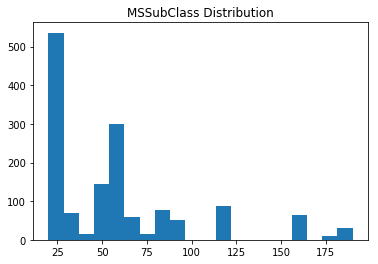

In [12]:
num_col = raw_num_cols[0]
sfv.num_hist(df_name='train', col_name=num_col)

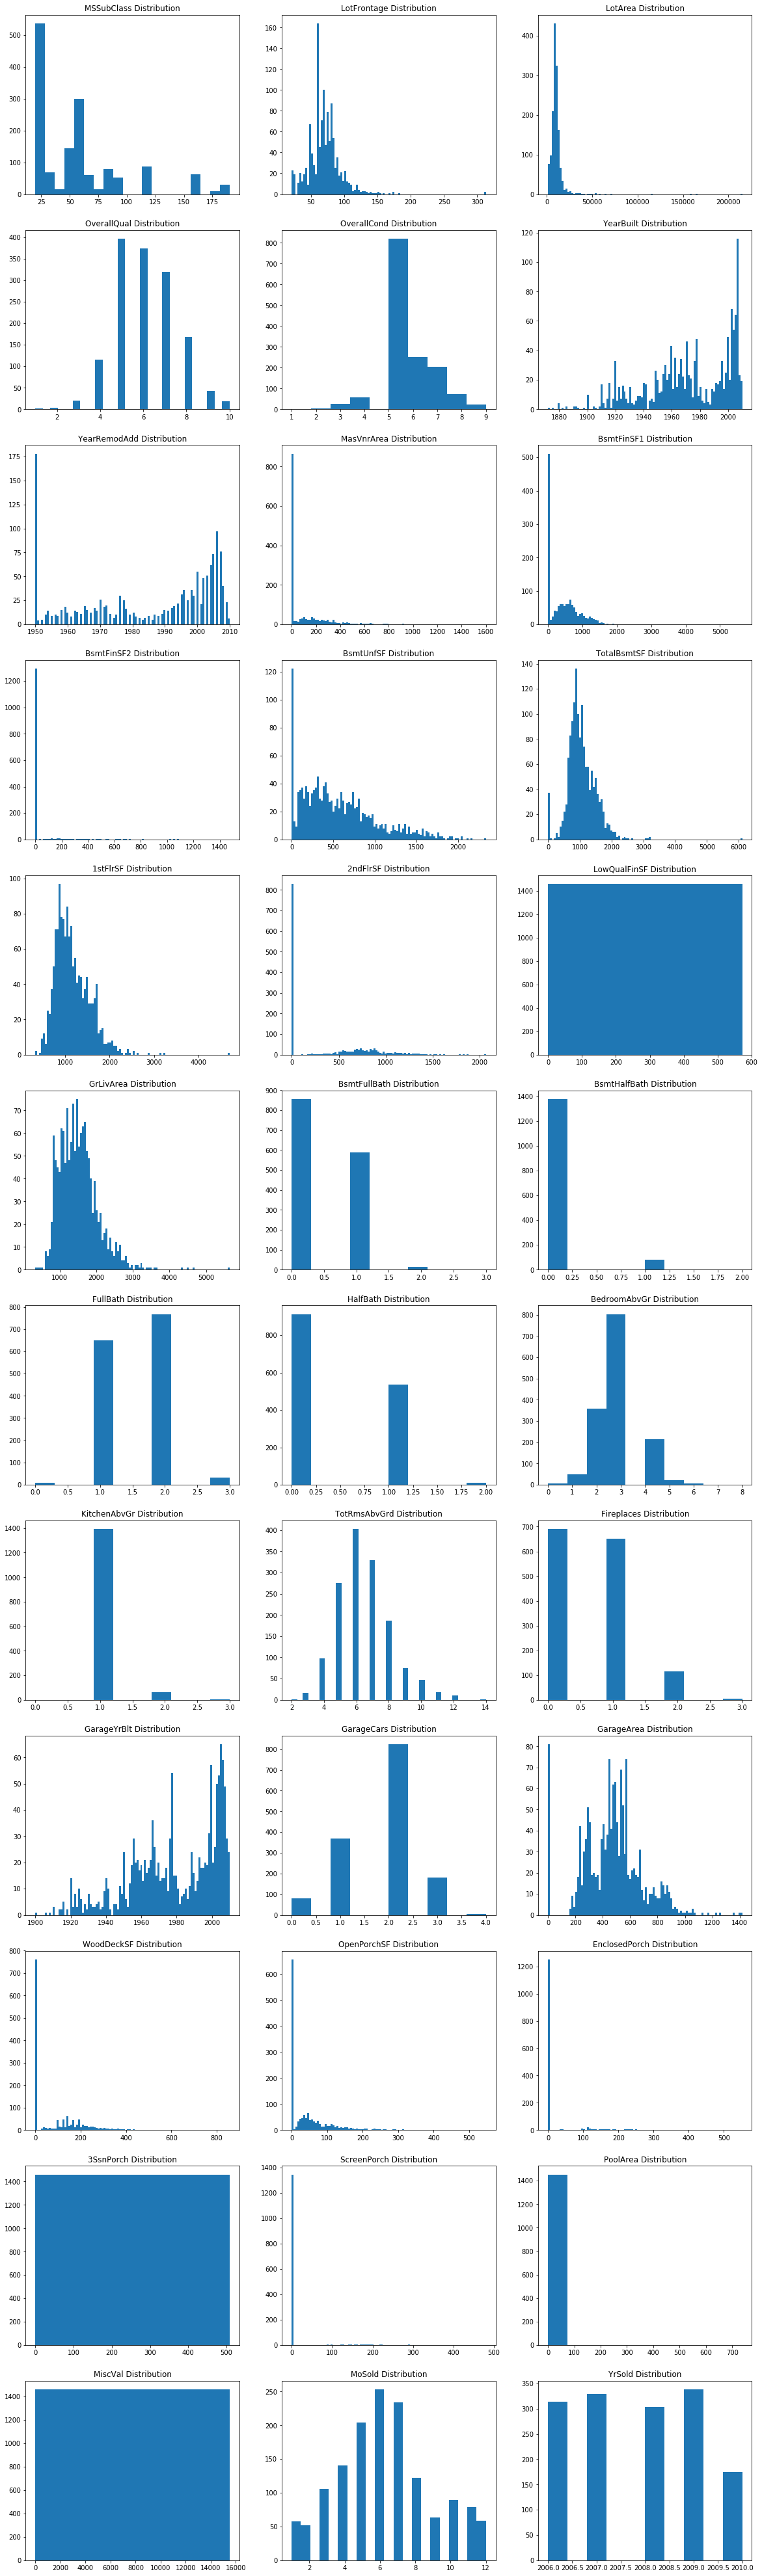

In [13]:
sfv.num_hists(df_name='train', num_cols=raw_num_cols)

In [14]:
sfv.num_hists_double(df_names=['train', 'test'], num_cols=raw_num_cols)

train and test
--------------


In [15]:
# ==============================================
# Part 3: Visualization for Categorical Features
# ==============================================

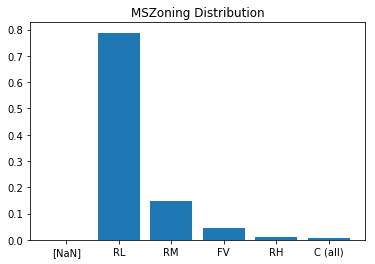

In [16]:
cat_col = raw_cat_cols[0]
sfv.cat_bar(df_name='train', col_name=cat_col)

In [17]:
sfv.cat_bars(df_name='train', cat_cols=raw_cat_cols)

In [18]:
sfv.cat_bars_double(df_names=['train', 'test'], cat_cols=raw_cat_cols)

train and test
--------------
